<a href="https://colab.research.google.com/github/sudhir15jan/Lead-Case-Study-/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting
- A road to success is incomplete without any failures in life. Each failure teaches you something new and makes you stronger at each phase. Each time you make a mistake, it’s important to learn from it and try not to repeat it again. That's how the idea of boosting is come to picture where each weak model modifyed and become a better model.

- Just as we sometimes develop life skills by learning from our mistakes, we can train our model to learn from the errors predicted and improvise the model’s prediction and overall performance. This is the most basic intuition of Boosting algorithm in Machine Learning.

<h2>What is Boosting?</h2>
The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners. Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor.</br>
<a href="boosting.jpg"><img src="https://i.ibb.co/jf5h5xk/1-jbncje-M4-Cfpob-En-DO0-ZTjw.webp" alt="1-jbncje-M4-Cfpob-En-DO0-ZTjw" border="0"></a>

To understand Boosting, it is crucial to recognize that boosting is a generic algorithm rather than a specific model. Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.

With that sorted out, it is time to explore different definitions of weakness and their corresponding algorithms. We’ll introduce two major algorithms: Gradient Boosting, Adaptive Boosting (AdaBoost) and Extreme Gradient Boosting (XGBoost).

# Gradient Boosting

In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor. Let's go through a step by step example of how Gradient Boosting Works:<br>

Let's take the below sample which has a nonlinear relationship between x and y to intuitively understand how it works.<br>

<a href="base_model.jpg"><img src="https://i.ibb.co/NjZjTDr/1-SZdr-Lz-Qa-XBx-So-Tg-RMt-Sxig.webp" alt="1-SZdr-Lz-Qa-XBx-So-Tg-RMt-Sxig" border="0"></a>

The first step is making a very naive prediction on the target y. We make the initial prediction F₀ as an overall average of y:<br>
<a href="predicted_model.jpg"><img src="https://i.ibb.co/LPk2cNB/1-Cff0i-DWUi-C-Tn-Wzw-Um-Vg.webp" alt="1-Cff0i-DWUi-C-Tn-Wzw-Um-Vg" border="0"></a>

You might feel using the mean for the prediction is silly, but don’t worry. We will improve our prediction as we add more weak models to it.

To improve our prediction, we will focus on the residuals (i.e. prediction errors) from the first step because that is what we want to minimize to get a better prediction. The residuals r₁ are shown as the vertical blue lines in the figure below.<br>
<a href="errors.jpg"><img src="https://i.ibb.co/XzH4tqS/1-32x-SZb7-FIIxw-FQeq9-MKCg-Q.webp" alt="1-32x-SZb7-FIIxw-FQeq9-MKCg-Q" border="0"></a>

To minimize these residuals, we are building a regression tree model with x as its feature and the residuals r₁ = y − mean(y) as its target. The reasoning behind that is if we can find some patterns between x and r₁ by building the additional weak model, we can reduce the residuals by utilizing it.

To simplify the demonstration, we are building very simple trees each of that only has one split and two terminal nodes which is called “stump”. Please note that gradient boosting trees usually have a little deeper trees such as ones with 8 to 32 terminal nodes.

Here we are creating the first tree predicting the residuals with two different values $\gamma_1$ = {6.0, −5.9}(we are using $\gamma$ to denotes the prediction).<br>
<a href="improved.jpg"><img src="https://i.ibb.co/HFtKFzw/1-N3-FYNWBEUO1b-VZo4-Bul-WIQ.webp" alt="1-N3-FYNWBEUO1b-VZo4-Bul-WIQ" border="0"></a>

This prediction $\gamma_1$ is added to our initial prediction $F_0$ to reduce the residuals. In fact, gradient boosting algorithm does not simply add $\gamma$ to F as it makes the model overfit to the training data. Instead, $\gamma$ is scaled down by learning rate ν which ranges between 0 and 1, and then added to F.
$$
F_1=F_0+v*\gamma_1
$$
In this example, we use a relatively big learning rate ν = 0.9 to make the optimization process easier to understand, but it is usually supposed to be a much smaller value such as 0.1.

After the update, our combined prediction $F_1$ becomes:<br>
$$F_1=\left\{
\begin{array}{}
F_0+v*6.0 & if x<= 49.5\\
F_0-v*5.9 & otherwise
\end{array}
\right.
$$
<a href="model.jpg"><img src="https://i.ibb.co/h1mdTQ0/1-x-DDhf-FTC57f-YHkhvl-K4-BTg.webp" alt="1-x-DDhf-FTC57f-YHkhvl-K4-BTg" border="0"></a><br>
Now, the updated residuals r₂ looks like this:<br>
<a href="model.jpg"><img src="https://i.ibb.co/QfZ7scm/1-L9-Gp-Euc-S0n4-Vvve-K0ss-I-A.webp" alt="1-L9-Gp-Euc-S0n4-Vvve-K0ss-I-A" border="0"></a>

In the next step, we are creating a regression tree again using the same x as the feature and the updated residuals r₂ as its target. Here is the created tree:<br>
<a href="model.jpg"><img src="https://i.ibb.co/FxbdPRK/1-i-Vz3-E-v-N4-EVNk1z-Utd0p-Ig.webp" alt="1-i-Vz3-E-v-N4-EVNk1z-Utd0p-Ig" border="0"></a><br>
Then, we are updating our previous combined prediction $F_1$ with the new tree prediction $\gamma_2$.<br>
<a href="model.jpg"><img src="https://i.ibb.co/FXnvjZW/1-7dt-Sxq-YLS8tea-SV7-Zv7u-UA.webp" alt="1-7dt-Sxq-YLS8tea-SV7-Zv7u-UA" border="0"></a><br>
Now We iterate these steps until the model prediction stops improving. Let's try thease step using python

## Problem Statement


**An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


In [ ]:
data = pd.read_csv('Training Data.csv')
data.head(2)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13364 entries, 0 to 13363
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 13364 non-null  int64  
 1   Income             13364 non-null  int64  
 2   Age                13364 non-null  int64  
 3   Experience         13364 non-null  int64  
 4   Married/Single     13364 non-null  object 
 5   House_Ownership    13364 non-null  object 
 6   Car_Ownership      13363 non-null  object 
 7   Profession         13363 non-null  object 
 8   CITY               13363 non-null  object 
 9   STATE              13363 non-null  object 
 10  CURRENT_JOB_YRS    13363 non-null  float64
 11  CURRENT_HOUSE_YRS  13363 non-null  float64
 12  Risk_Flag          13363 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.3+ MB


In [ ]:
df = data.copy()

In [ ]:
#Also id, city, profession and state column is not needed, so we can drop that
df.drop(columns=['Id', 'STATE', 'CITY', 'Profession'], inplace=True, axis=1)

In [ ]:
df = pd.get_dummies(data = df, columns=['Married/Single', 'House_Ownership', 'Car_Ownership'])
df.head(2)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1303834,23,3,3.0,13.0,0.0,0,1,0,0,1,1,0
1,7574516,40,10,9.0,13.0,0.0,0,1,0,0,1,1,0


In [ ]:
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

In [ ]:
y.value_counts()

0.0    11369
1.0     1994
Name: Risk_Flag, dtype: int64

In [ ]:
y.isnu

1

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
y_ros.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y contains NaN.

Here we can see that our target variable has much more number of 0's than 1's. So this will make our model bias and reduce its efficiency. So we will OverSample it to make it equal and reduce Bias.

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
#Predictors=['Age','KM']

X=carpricedata[Predictors].values
y=carpricedata[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1142, 7)
(1142,)
(286, 7)
(286,)


# Training Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbmreg=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1, n_estimators=100,criterion='friedman_mse', max_depth=3)

# Printing all the parameters of Decision Tree
print(gbmreg)

GradientBoostingRegressor()


In [ ]:
# Creating the model on Training Data
GBM=gbmreg.fit(X_train,y_train)
prediction=GBM.predict(X_test)

In [ ]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, GBM.predict(X_train)))

R2 Value: 0.9383279519509122


In [ ]:
#Measuring accuracy on Testing Data
import numpy as np
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 91.92044374048474


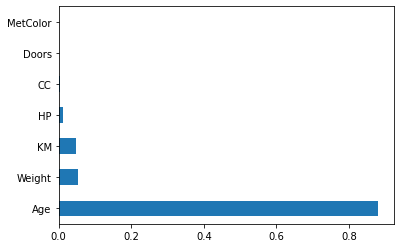

In [ ]:
# Plotting the feature importance for Top 10 most important columns
import matplotlib.pyplot as plt
feature_importances = pd.Series(GBM.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Printing some sample values of prediction
import numpy as np
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

In [ ]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

In [ ]:
# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

   Price  PredictedPrice        APE
0   8900          7408.0  16.764045
1   8950          7578.0  15.329609
2  17950         18826.0   4.880223
3   7950          8079.0   1.622642
4  16250         16880.0   3.876923


In [ ]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

In [ ]:
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 91.9206313407857
Median Accuracy on test data: 93.6689497716895


# Classification

<h4> Ad click Project </h4>

Let us now start implementing what we learned from the previous section into python codes. We will use a website data of Customers to understand which customer will be click the AD, by the end of this section we will be able to make predictions using our "home-made" Logistic Regression.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [ ]:
add_data=pd.read_csv("web_data.csv")

In [ ]:
add_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_Name,Sex,Time_Period,Weekday,Month,Year,Clicked
0,6286829,80.03,44,24030.06,150.84,11,0,83,0,5,2,3,2020,1
1,8572018,68.01,25,68357.96,188.32,24,0,329,1,2,0,2,2020,0
2,1101842,45.99,33,51163.14,124.61,10,0,807,1,5,2,1,2020,1
3,5774347,77.07,40,44559.43,261.02,24,0,824,0,3,5,5,2020,0
4,9737908,82.03,41,71511.08,187.53,22,0,707,0,0,1,6,2020,0


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Ad_Topic', 'Country_Name',
            'City_Name', 'Sex', 'Time_Period', 'Weekday', 'Month']

X=add_data[Predictors].values
y=add_data[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5325, 11)
(5325,)
(1332, 11)
(1332,)


# Training Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbmclf=GradientBoostingClassifier(loss='deviance',learning_rate=0.1, n_estimators=100,criterion='friedman_mse', max_depth=3)

# Printing all the parameters of Decision Tree
print(gbmclf)

GradientBoostingClassifier()


In [ ]:
# Creating the model on Training Data
GBMC=gbmclf.fit(X_train,y_train)
y_pred=GBMC.predict(X_test)

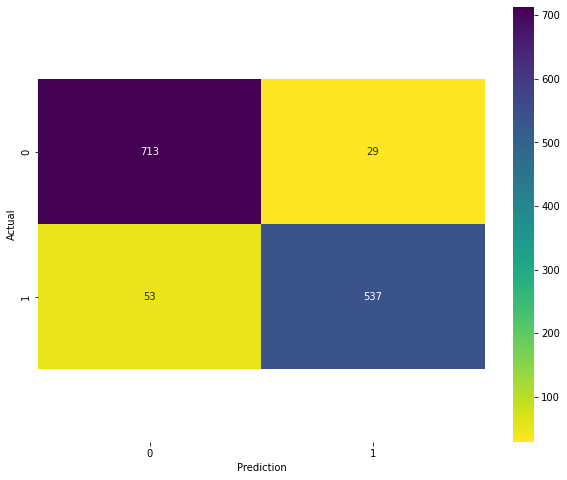

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       742
           1       0.95      0.91      0.93       590

    accuracy                           0.94      1332
   macro avg       0.94      0.94      0.94      1332
weighted avg       0.94      0.94      0.94      1332



In [ ]:
# import necessary packages to measure model performace
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Checking Confusion Metrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,4))

Accuracy of the model on Testing Sample Data: 0.9383


In [ ]:
# import necessary packages to measure model performace
from sklearn.metrics import roc_curve, auc
#AUC score
y_pred_gb = GBMC.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_pred_gb[:,1])
auc_gb = auc(fpr_gb, tpr_gb)
print ('AUC Score: {} '.format(auc_gb*100))

AUC Score: 96.24491753848966 


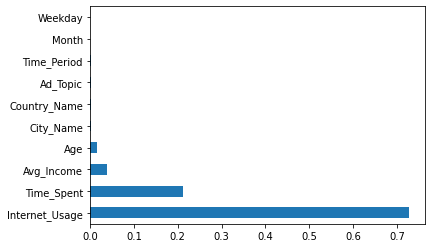

In [ ]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(GBMC.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()